# Bike Hiring case study using RFE

## Problem statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

## Reading and understanding the data

Let us first import NumPy and Pandas and read the Bike hiring dataset

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
bike = pd.read_csv("day.csv")

In [62]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [63]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [64]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Visualising the Data

We'll visualise our data using matplotlib and seaborn.

Lets visualise numerical variables

<Figure size 3000x1600 with 0 Axes>

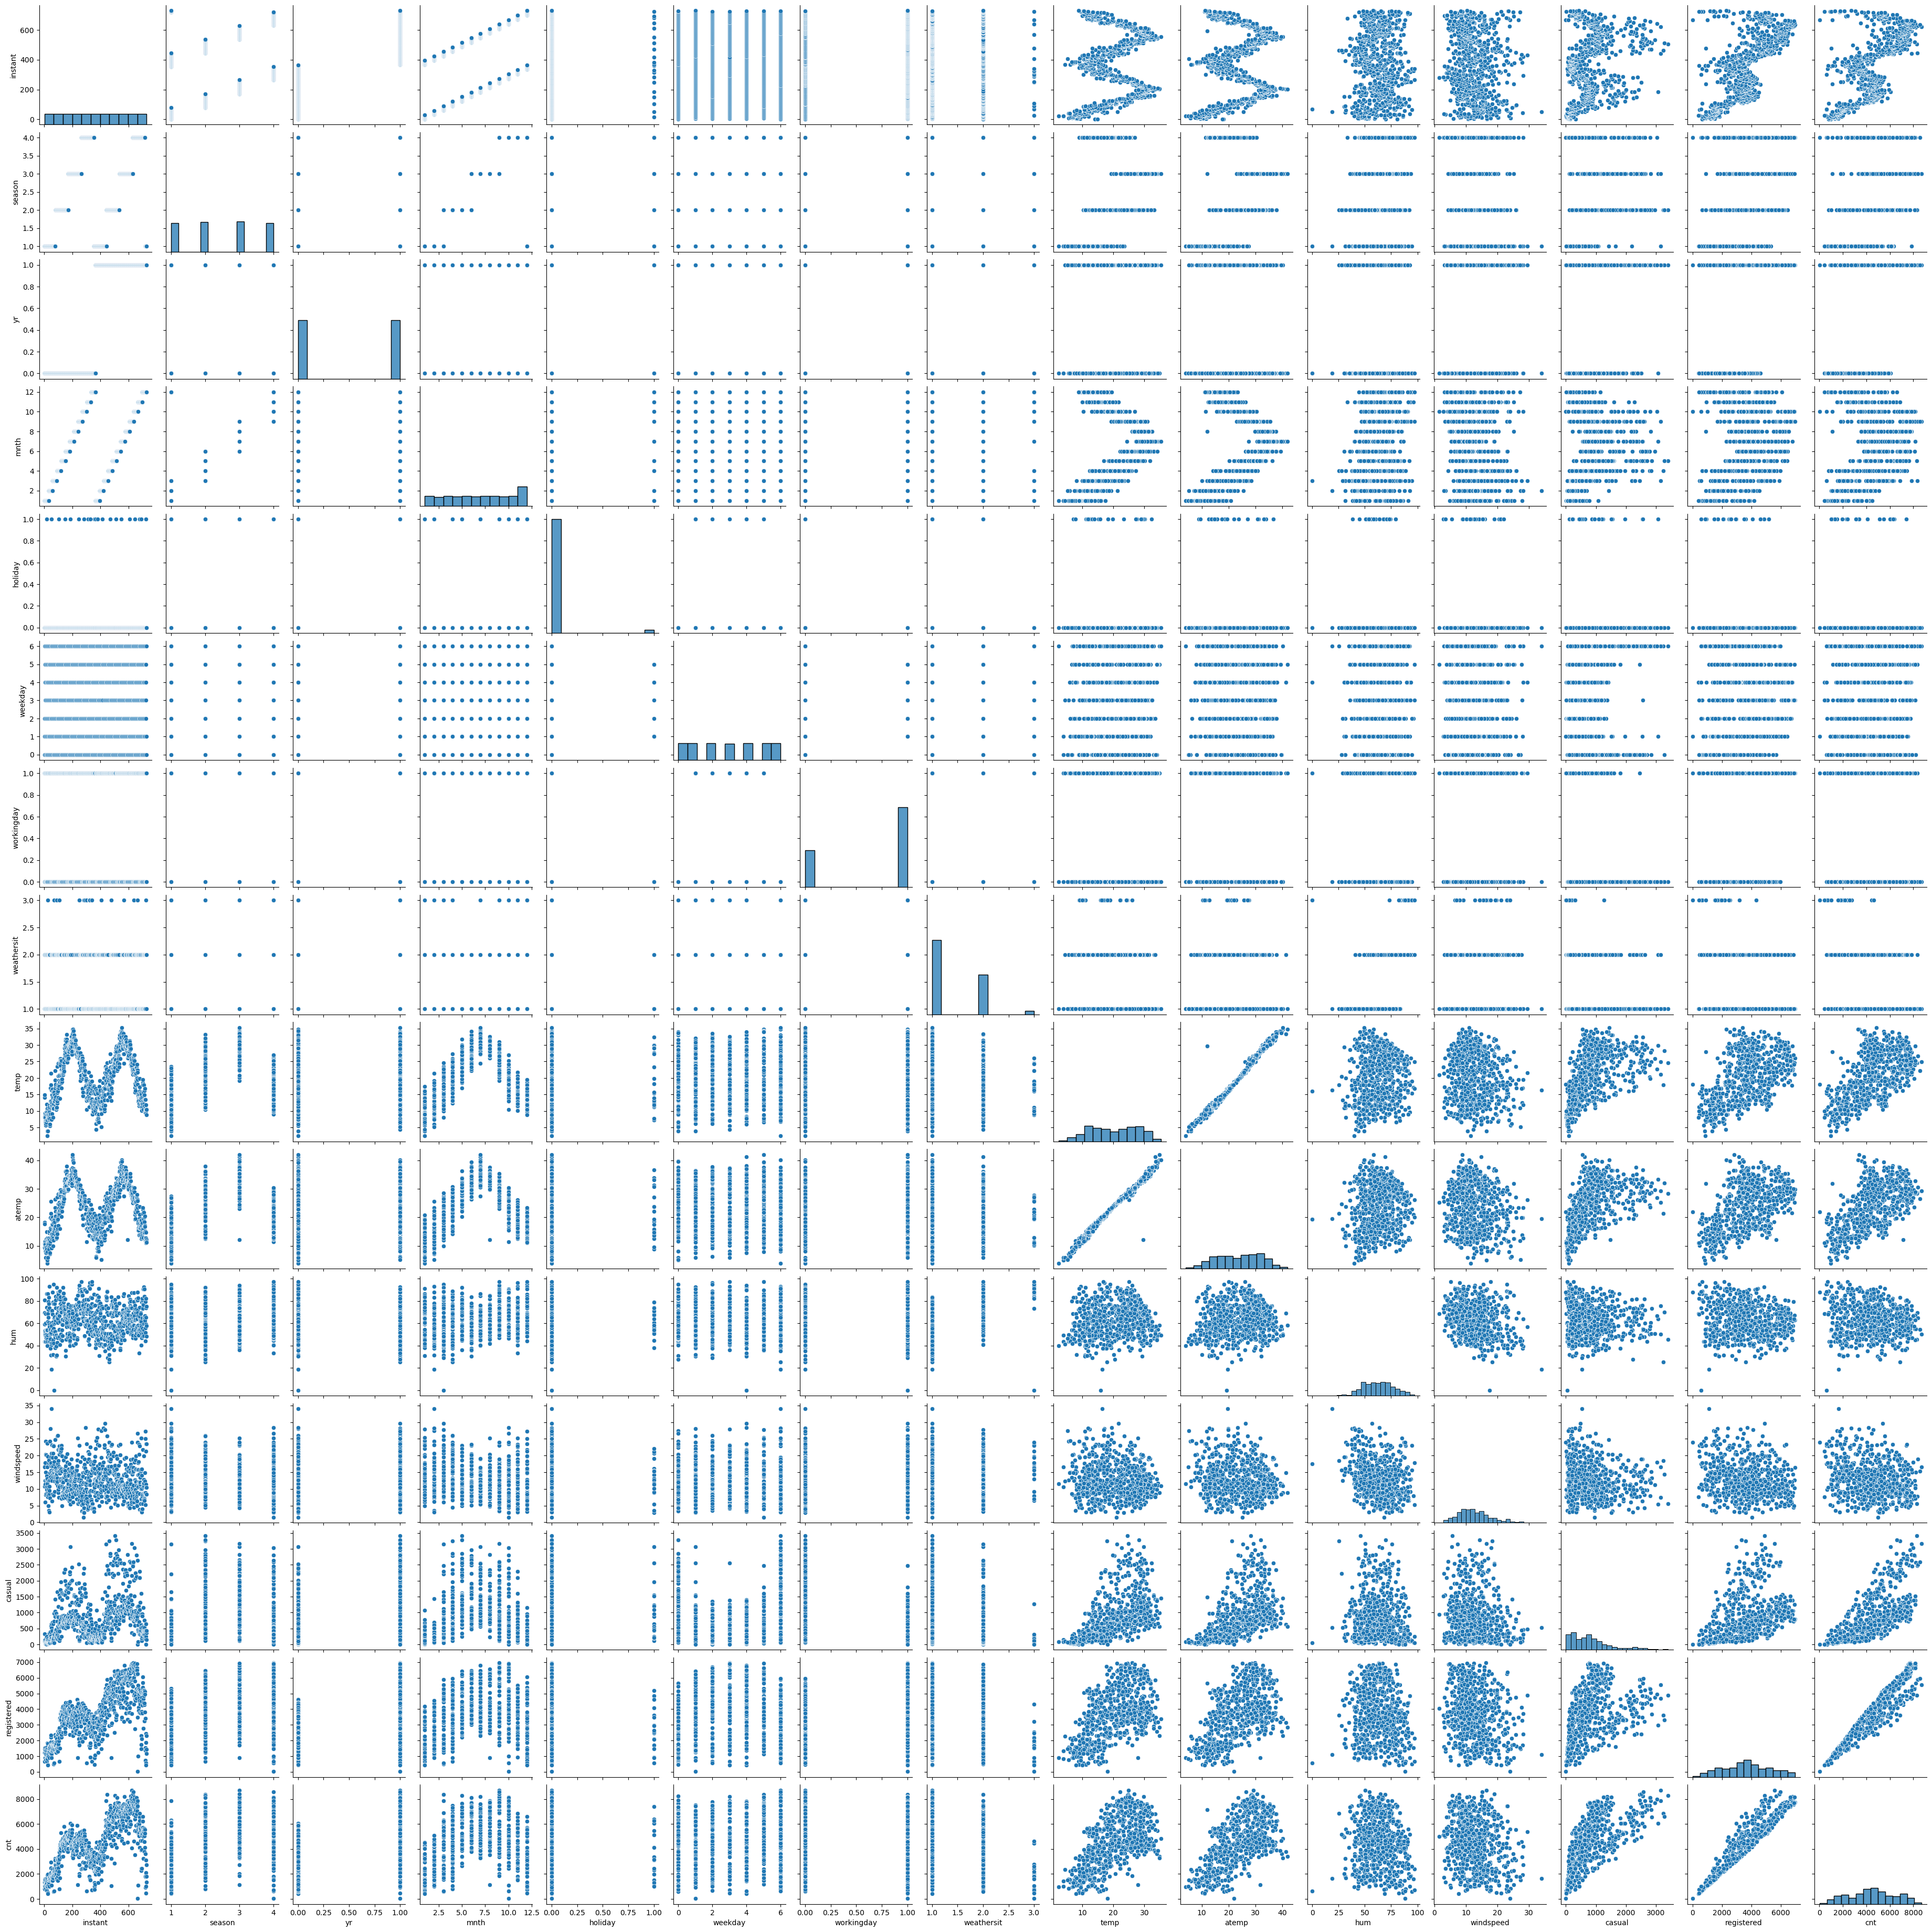

In [65]:
plt.figure(figsize=(30, 16))
sns.pairplot(bike)
plt.show()

### Looking at the graphs, it looks like temp and aTemp have better correlation to cnt
### Also, registered users are using the rides more than casual users

## Data Preparation

Notice that column 'instant' is just used for indexing and doesnt affect the analysis. So we can drop it.
Also column 'dteday' is not needed as the there are columns for month and year in the dataset. So dropping it too.

In [66]:
bike.pop('instant')

0        1
1        2
2        3
3        4
4        5
      ... 
725    726
726    727
727    728
728    729
729    730
Name: instant, Length: 730, dtype: int64

In [67]:
bike.pop('dteday')

0      01-01-2018
1      02-01-2018
2      03-01-2018
3      04-01-2018
4      05-01-2018
          ...    
725    27-12-2019
726    28-12-2019
727    29-12-2019
728    30-12-2019
729    31-12-2019
Name: dteday, Length: 730, dtype: object

The dataset has the variables 'weathersit', 'season', 'mnth', 'weekday' have values as 1, 2, 3, 4 which have specific labels associated with them. These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case. So, it is advisable to convert these feature values into categorical string values before proceeding with model building.

In [68]:
# Defining the map function for season
def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Applying the function to the season feature
bike[['season']] = bike[['season']].apply(season_map)

In [69]:
# Defining the map function for mnth
def mnth_map(x):
    return x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr',
                 5:'may', 6:'jun', 7:'jul', 8:'aug',
                 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

# Applying the function to the mnth feature
bike[['mnth']] = bike[['mnth']].apply(mnth_map)

In [70]:
# Defining the map function for weekday
def weekday_map(x):
    return x.map({6:'sun', 0:'mon', 1:'tue', 2:'wed', 3:'thu',
                 4:'fri', 5:'sat'})

# Applying the function to the weekday feature
bike[['weekday']] = bike[['weekday']].apply(weekday_map)

In [71]:
# Defining the map function for weathersit
def weathersit_map(x):
    return x.map({1:'Clear', 2:'MistandCloudy', 3:'LightSnow', 4:'HeavyRainandIcePallets'})

# Applying the function to the weathersit feature
bike[['weathersit']] = bike[['weathersit']].apply(weathersit_map)

In [72]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sun,0,MistandCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,mon,0,MistandCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,tue,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,wed,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,thu,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [73]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


In [74]:
# Holiday and Working day are redundant as we cant have a working day during holidays
bike.pop('holiday')

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Name: holiday, Length: 730, dtype: int64

In [75]:
# Lets drop casual and registered columns as they are included in cnt
bike.pop('casual')

0      331
1      131
2      120
3      108
4       82
      ... 
725    247
726    644
727    159
728    364
729    439
Name: casual, Length: 730, dtype: int64

In [76]:
bike.pop('registered')

0       654
1       670
2      1229
3      1454
4      1518
       ... 
725    1867
726    2451
727    1182
728    1432
729    2290
Name: registered, Length: 730, dtype: int64

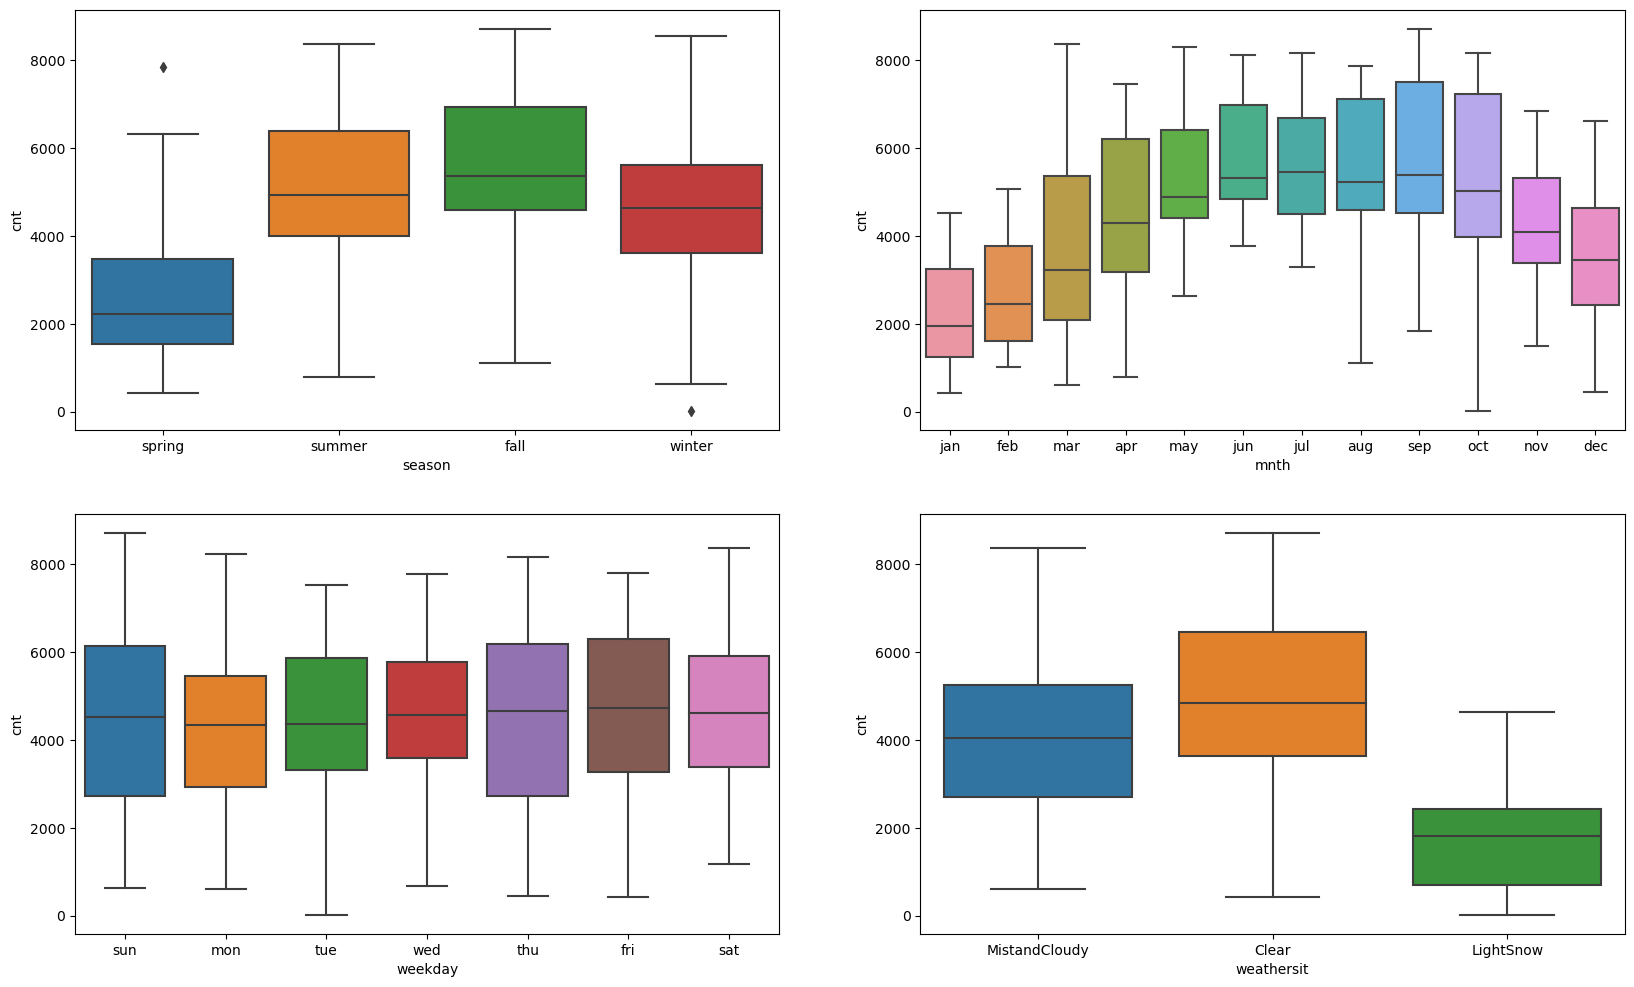

In [77]:
#Lets visualize the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

### Count is more during summers and fall season and even month graph suggests the same. 

### Dummy variables

Four categorical variables 'weathersit', 'season', 'mnth', 'weekday' have 6 to 12 levels.
We need to convert these levels into integers.
Lets create dummy variables for these columns.

In [78]:
status = pd.get_dummies(data=bike, columns=['weathersit', 'season', 'mnth', 'weekday'], drop_first = True)

In [79]:
status.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,weathersit_LightSnow,weathersit_MistandCloudy,season_spring,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [80]:
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        730 non-null    int64  
 1   workingday                730 non-null    int64  
 2   temp                      730 non-null    float64
 3   atemp                     730 non-null    float64
 4   hum                       730 non-null    float64
 5   windspeed                 730 non-null    float64
 6   cnt                       730 non-null    int64  
 7   weathersit_LightSnow      730 non-null    uint8  
 8   weathersit_MistandCloudy  730 non-null    uint8  
 9   season_spring             730 non-null    uint8  
 10  season_summer             730 non-null    uint8  
 11  season_winter             730 non-null    uint8  
 12  mnth_aug                  730 non-null    uint8  
 13  mnth_dec                  730 non-null    uint8  
 14  mnth_feb  

In [81]:
# Dropping atemp as it is very much correlated to temp
status.pop('atemp')

0      18.18125
1      17.68695
2       9.47025
3      10.60610
4      11.46350
         ...   
725    11.33210
726    12.75230
727    12.12000
728    11.58500
729    11.17435
Name: atemp, Length: 730, dtype: float64

## Split the data in training and test sets
### Let's use 'status' dataframe for further analysis, also notice that we need not delete the old columns as there are no old columns in 'status' dataframe.

In [82]:
# Splitting the data
np.random.seed(0)
df_train, df_test = train_test_split(status, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Numeric Features
Rescaling the data to fall in the range of 0-1
Out of two methods, MinMax scaling and Standardisation, lets use MinMax sclaing

In [83]:
scaler = MinMaxScaler()

In [84]:
# Apply scaler() to all the columns except the 'yes-no' eg:workingday  and 'dummy' variables eg:mnth_may, weekday_mon
num_vars = ['temp', 'hum', 'windspeed','cnt']

# Using fit_transform as we are applying it in train set
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [85]:
df_train.head()

,yr,workingday,temp,hum,windspeed,cnt,weathersit_LightSnow,weathersit_MistandCloudy,season_spring,season_summer,...,mnth_may,mnth_nov,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
653,1,1,0.509887,0.575354,0.300794,0.864243,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0.442393,0.640189,0.255342,0.465255,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0.245101,0.498067,0.663106,0.204096,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


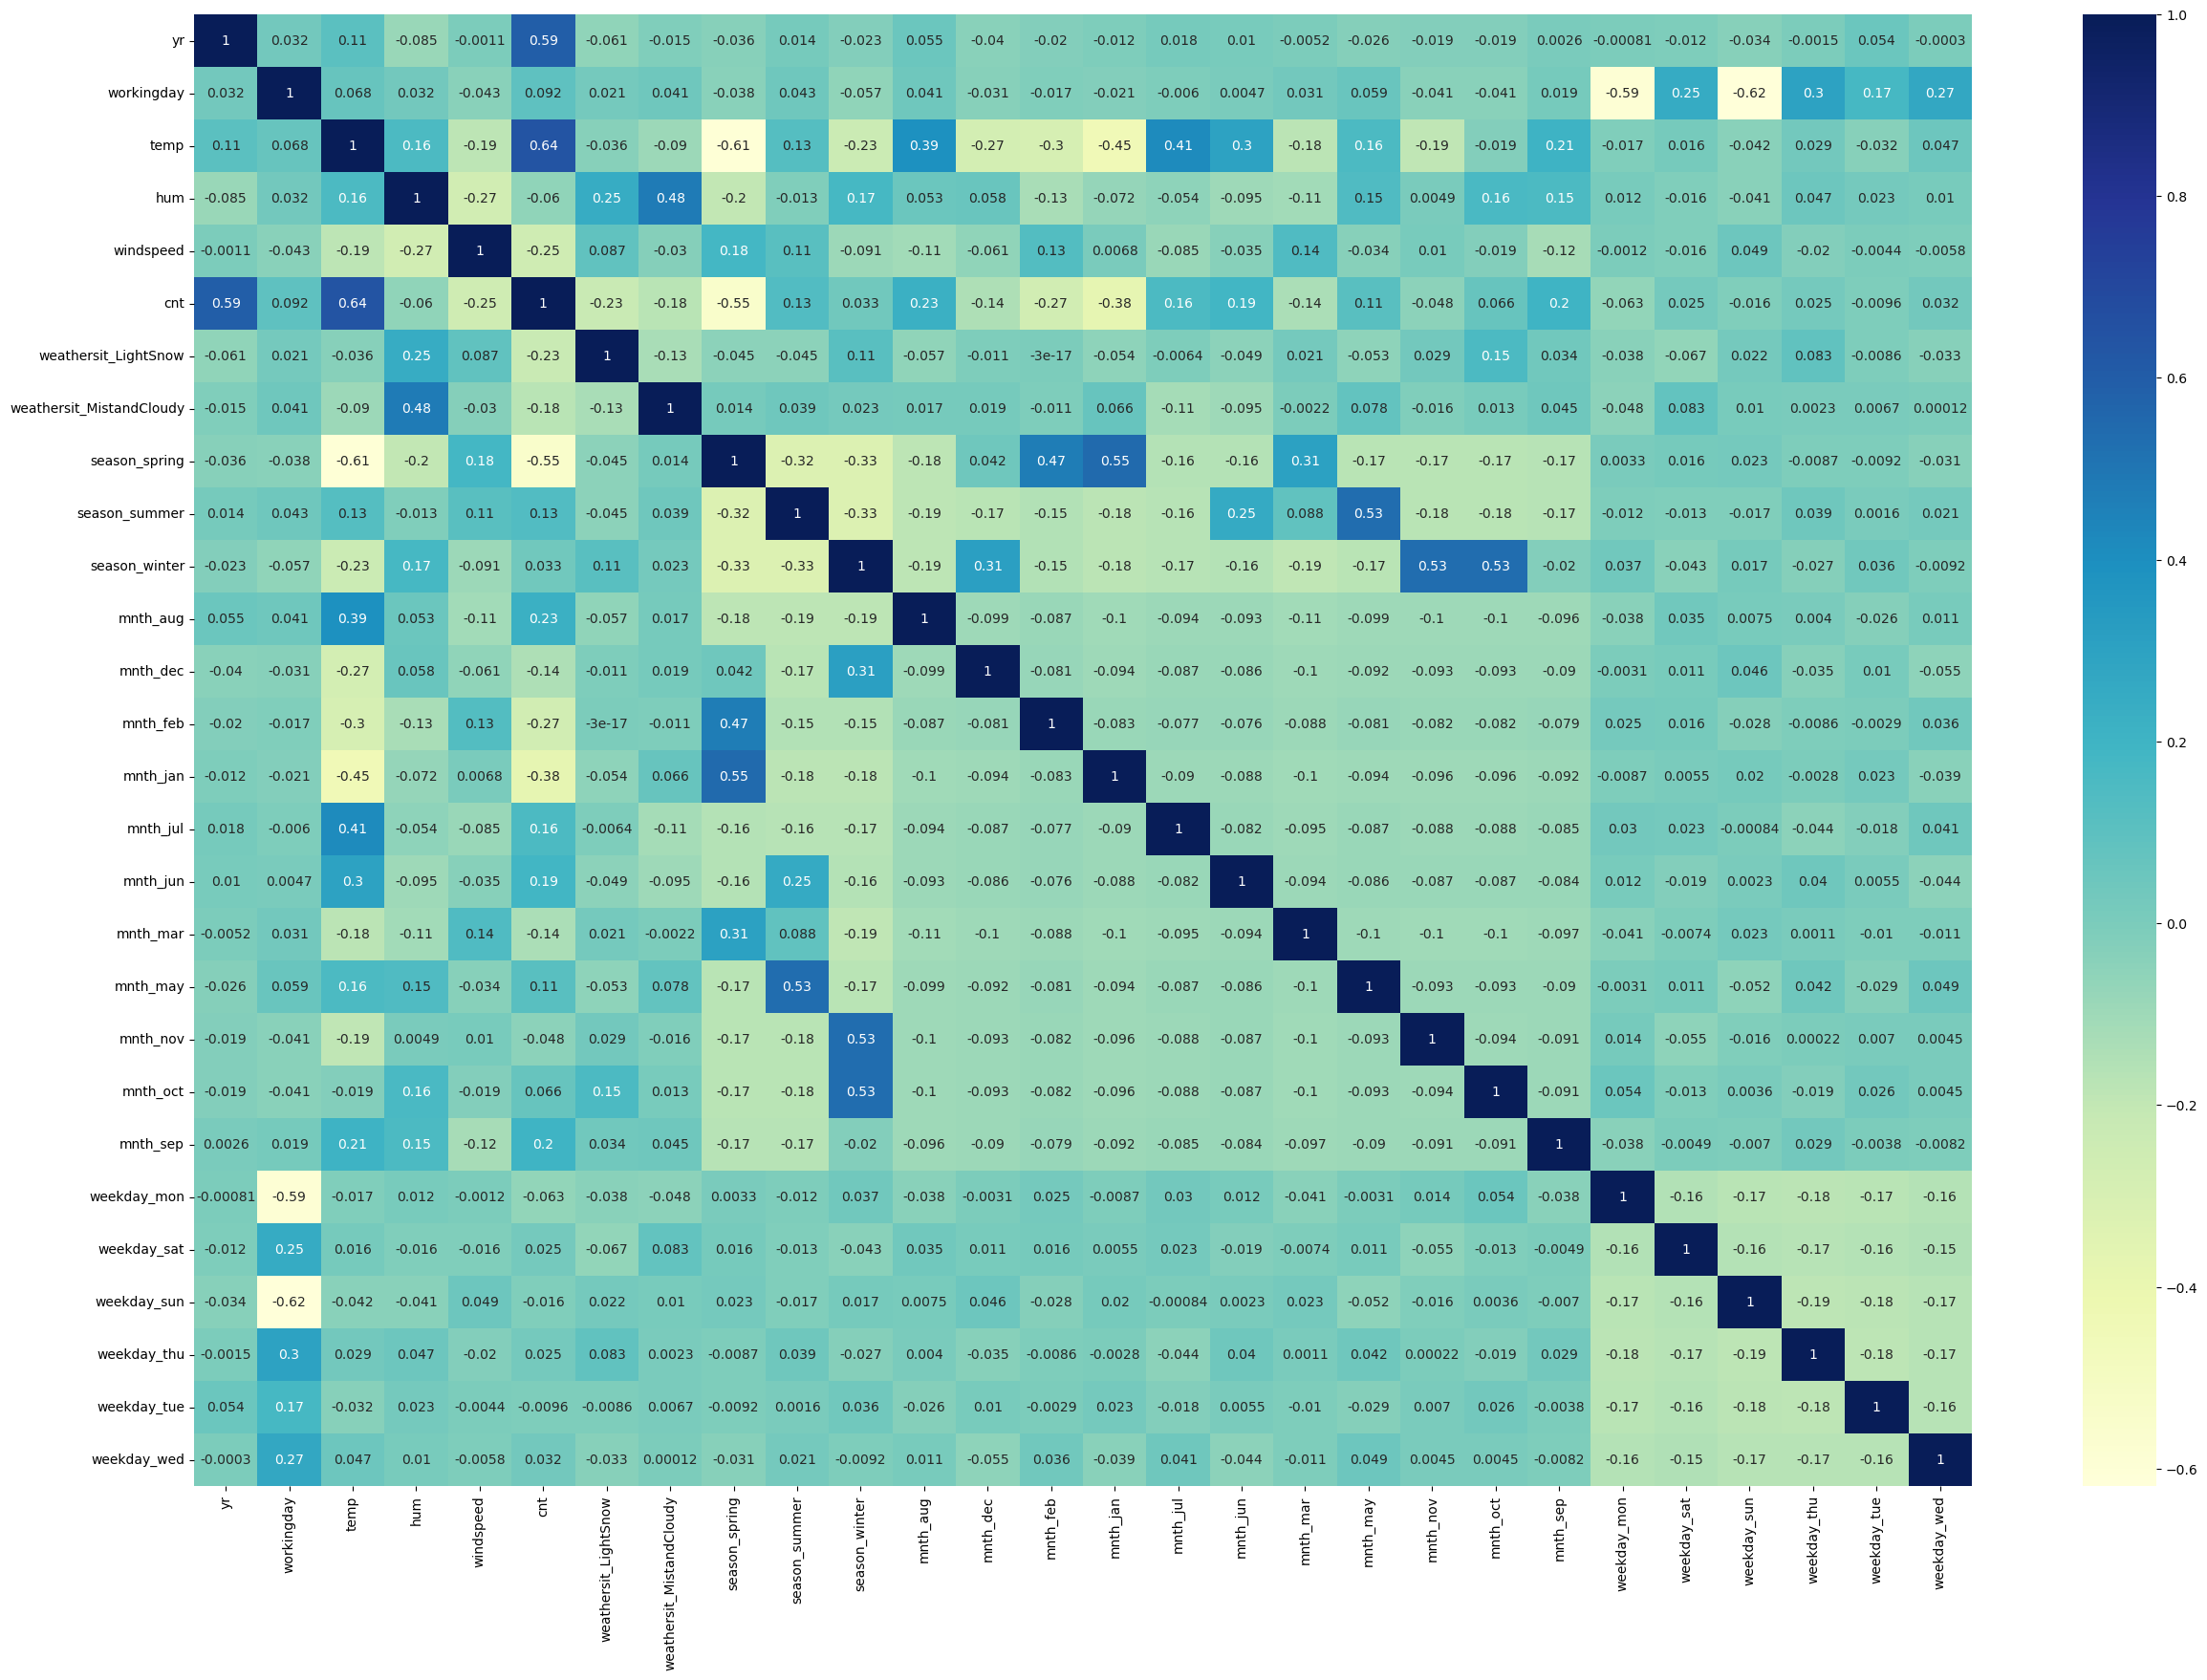

In [86]:
# Let's check the correlation coefficients now. 
plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Looking at the map, we can notice that temp is correlated to Count when compared to other features

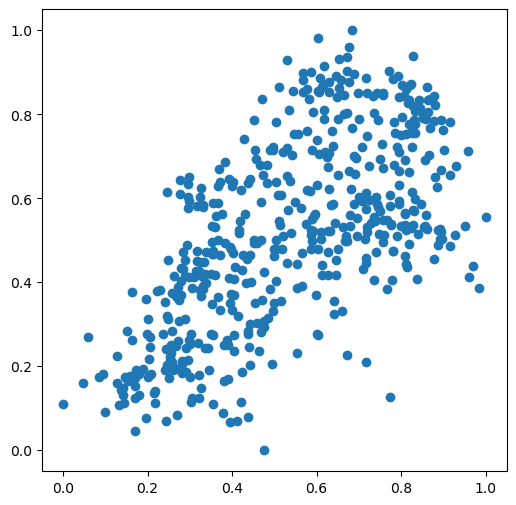

In [87]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [88]:
# Lets divide the set into X and y 
y_train = df_train.pop('cnt')
X_train = df_train

## Model building

### Lets fit a line through training data. Lets use statsmodel. We need to add a constant to the dataset. 

In [89]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Lets print the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           5.80e-61
Time:                        22:48:00   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### R squared is not that great. Lets add another feature 'yr' which has correlation to 'cnt'

In [90]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','yr']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Lets print the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          9.25e-130
Time:                        22:48:07   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

### Both R squared and adjusted R squared have increased a bit. Lets add 'season_spring' which has negative correlation to cnt

In [91]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','yr','season_spring']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Lets print the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     475.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          8.50e-147
Time:                        22:48:12   Log-Likelihood:                 380.27
No. Observations:                 510   AIC:                            -752.5
Df Residuals:                     506   BIC:                            -735.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2025      0.019     10.795

### Both R squared and adjusted R squared have increased again to a better score this time. Lets add all the variables and try.

In [92]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Lets print the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          8.74e-182
Time:                        22:48:19   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### R squared and adjusted R squared are really good now with all the variables but the P-values are really high for some of the variables. Lets use RFE to get rid of some of the features.

In [95]:
lm = LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 10)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_MistandCloudy', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', False, 4),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 8),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 6),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 17),
 ('mnth_mar', False, 18),
 ('mnth_may', False, 10),
 ('mnth_nov', False, 7),
 ('mnth_oct', False, 14),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 3),
 ('weekday_sat', False, 15),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 16),
 ('weekday_tue', False, 12),
 ('weekday_wed', False, 13)]

In [96]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'weathersit_LightSnow',
       'weathersit_MistandCloudy', 'season_spring', 'mnth_jul', 'mnth_sep',
       'weekday_sun'],
      dtype='object')

In [97]:
X_train_rfe = X_train[col]

In [98]:
# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr_rfe = sm.OLS(y_train, X_train_lm).fit()

# Lets print the summary
print(lr_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.33e-184
Time:                        22:50:45   Log-Likelihood:                 488.62
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     499   BIC:                            -908.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### R squared and adjusted R squared are very much closer what we had got earlier and also the P values are as per expected levels. Lets verify the VIF to conclude the modeling process.

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,14.91
1,temp,11.88
3,windspeed,3.98
5,weathersit_MistandCloudy,2.10
0,yr,2.03
6,season_spring,1.84
7,mnth_jul,1.40
4,weathersit_LightSnow,1.20
8,mnth_sep,1.20
9,weekday_sun,1.18


### Lets drop hum as the VIF is too high and check the results

In [100]:
X_train_rfe2 = X_train_rfe.drop('hum', 1)

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_43183/2024486318.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_rfe2 = X_train_rfe.drop('hum', 1)


In [101]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr_rfe2 = sm.OLS(y_train, X_train_lm2).fit()

# Lets print the summary
print(lr_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.3
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          4.65e-183
Time:                        22:51:26   Log-Likelihood:                 483.30
No. Observations:                 510   AIC:                            -946.6
Df Residuals:                     500   BIC:                            -904.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### P-values and R squared looks good with hum dropped. Lets check the VIF again.

In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.63
2,windspeed,3.85
0,yr,2.03
5,season_spring,1.52
4,weathersit_MistandCloudy,1.48
6,mnth_jul,1.33
7,mnth_sep,1.20
8,weekday_sun,1.18
3,weathersit_LightSnow,1.06


### Lets drop weekday_sun as the p value is high and check the results

In [114]:
#backup = X_train_rfe2
X_train_rfe2 = X_train_rfe2.drop('weekday_sun', 1)
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr_rfe2 = sm.OLS(y_train, X_train_lm2).fit()

# Lets print the summary
print(lr_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.84e-183
Time:                        23:02:15   Log-Likelihood:                 481.31
No. Observations:                 510   AIC:                            -944.6
Df Residuals:                     501   BIC:                            -906.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

/var/folders/gg/7k4yc41x7613l28wqf24kd0m0000gn/T/ipykernel_43183/2349655653.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_rfe2 = X_train_rfe2.drop('weekday_sun', 1)


### This model looks good as the p value and VIF are under acceptable levels and both Adjusted R Squared and R Squared are well mainintained at similar level.

## Residual Analysis

So, now to check if the error terms are also normally distributed, let us plot the histogram of the error terms and see what it looks like.

In [115]:
y_train_pred = lr_rfe2.predict(X_train_lm2)

In [116]:
# R2 score of train set
r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
r2

0.823860717895505

/Users/personal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

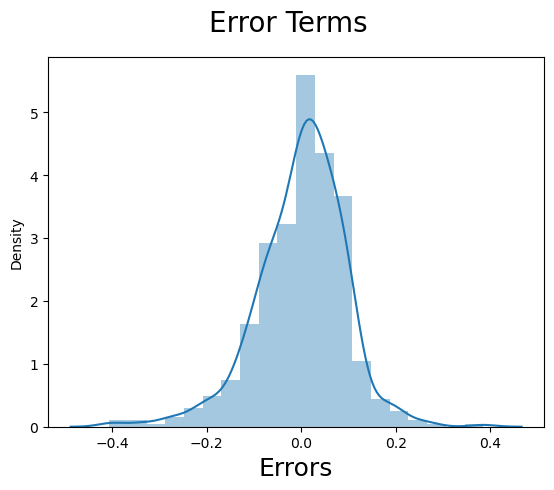

In [117]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

## Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model i.e. lr_rfe3

In [119]:
num_vars = ['temp', 'hum', 'windspeed','cnt']

# Using transform as we are applying it in test set

df_test[num_vars] = scaler.transform(df_test[num_vars])

Lets split the test set

In [107]:
y_test = df_test.pop('cnt')
X_test = df_test

In [108]:
# Adding constant variable to test dataframe
X_test_m2 = sm.add_constant(X_test)

In [120]:
# Creating X_test_m2 dataframe by keeping columns required in X_test_m2_edited
X_test_m2_edited = X_test_m2[["const","yr","temp","windspeed","season_spring","weathersit_MistandCloudy","mnth_jul","mnth_sep","weathersit_LightSnow"]]

In [121]:
X_test_m2_edited.shape

(219, 9)

In [122]:
# Making predictions using the third model
y_pred_m2 = lr_rfe2.predict(X_test_m2_edited)

## Model Evaluation

Text(0, 0.5, 'y_pred')

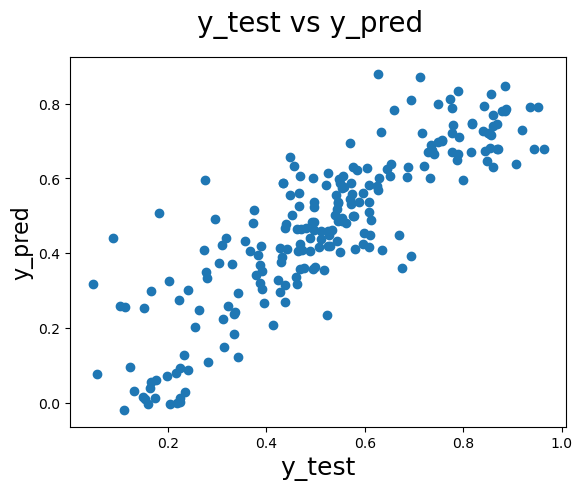

In [123]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

In [124]:
r2 = r2_score(y_true=y_test, y_pred=y_pred_m2)
r2

0.6647238409530499